<a href="https://colab.research.google.com/github/franklin-univ-data-science/comp411/blob/master/Module04_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 4

1. Why do we split samples into training and test set? What does the stratify mean?
1. Explain what are the overfitting and regularization.
1. Load last week's data set (fruit) and perceptron code, add the feature scaling and run the code again. Why is the convergence much more efficient? 
1. Load the scikit-learn's Wine recognition dataset; separate 20% data as test data set; predict the wine quality using logistic regression and support vector machine, and print the accuracy using test set. 


To load the data set:
```python
from sklearn import datasets
import numpy as np

df = datasets.load_wine()

X = df.data
y = df.target

```

You can check the targets and features by:
```python
print(df.target_names)
print(df.feature_names)
```

To get more details of the wine data set:https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

5. In two to three paragraphs of prose (i.e. sentences, not bullet lists), summarize and interact with the content that was covered this week in readings and in class meeting. In your summary, you should highlight the major topics, methods, and practices that were covered. Your summary should also interact with the material through personal observations, reflections, and applications to the field of study. In particular, highlight what surprised, enlightened, or otherwise engaged you. In other words, you should think and write critically not just about what was presented but also what you have learned through the session.


The samples are split into training and test sets to see how the model performs using unseen data. The samples start with running given data to help set it up but to make sure it is running properly, it is split to use the unseen data. Stratify means that the samples that have been split will return the training and test subsets that have the same proportions as the input dataset. This is used to compare the unseen data with the input dataset to see how it is running. 

Overfitting is when a model does well when it is given the training data but has trouble with the unseen data. Regulation is a method that is used to prevent overfitting. This method gives additional information that is used to penalize extreme parameter values.

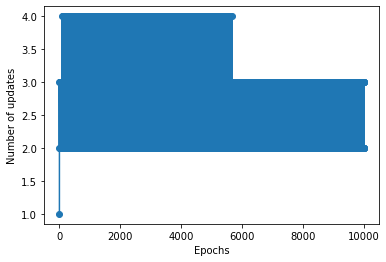

Misclassified samples: 5


In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/fruit.csv')
import matplotlib.pyplot as plt
import numpy as np


islemon= data.iloc[0:40, 0].values
islemon = np.where(islemon == 'lemon', -1, 1)
X = data.iloc[0:40, [1, 2]].values
class Perceptron():
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, islemon):
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size= X.shape[1]) 
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, islemon):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        
        return X @ self.w_
    
    def predict(self, X):
       
        return np.where(self.net_input(X) >= 0.0, 1, -1)

m = islemon.size
vector_ones = np.ones(m).reshape(m, 1)
X1 = np.hstack([vector_ones, X])

ppn = Perceptron(eta=0.1, n_iter=10000)

ppn.fit(X1, islemon)

plt.plot(range(1, ppn.n_iter + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()
islemon_pred = ppn.predict(X1)

print('Misclassified samples: %d' % (islemon != islemon_pred).sum())
X_train, X_test, islemon_train, islemon_test = train_test_split(
    X, islemon, test_size=0.5, random_state=1, stratify=islemon)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)




The convergence is more efficient because the feature scaling helps with creatinga set boundary for the data making it faster.

In [47]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

df = datasets.load_wine()
X = df.data
y = df.target
print(df.target_names)
print(df.feature_names)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
lr = LogisticRegression(random_state=1, solver='liblinear', multi_class='auto')
lr.fit(X_train_std, y_train)

svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std, y_train)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels counts in y: [59 71 48]
Labels counts in y_train: [47 57 38]
Labels counts in y_test: [12 14 10]
Accuracy: 0.97


    This week we started working with scikit and splitting data. We took the lesson on setting up the data from last week and expanded by using the training and test data sets. These data sets are used to determine if the model can work with unknown data as well as it does known data. This is very useful as there is always the chance that the model would work perfectly with given data but not be able to understand how to work with the unknown. The perceptron that we started last week has been expanded with the accuracy method being added to help with the misclassification error. Then we started on logistic regression which is used to find the probability of the predictions. 